In [1]:
import os
import pandas as pd

import mar
import preprocessing

In [2]:
pat_num = 9

In [3]:
data_dir = os.path.join(os.path.dirname(os.getcwd()), "data")
output_dir = os.path.join(os.path.dirname(os.getcwd()), "output")

if not os.path.exists(os.path.join(data_dir, f'Patient{pat_num}')):
    os.makedirs(os.path.join(data_dir, f'Patient{pat_num}'))

if not os.path.exists(os.path.join(output_dir, f'Patient{pat_num}')):
    os.makedirs(os.path.join(output_dir, f'Patient{pat_num}'))

In [4]:
mar_data = preprocessing.load_mar_data(data_dir, pat_num)
sickbay_data = preprocessing.load_sickbay_data(data_dir, pat_num)
sbs_data = preprocessing.load_retro_data(data_dir, pat_num, ignore_default=True)
accel_data = preprocessing.load_accel_data(data_dir, pat_num)
# ecg_data = preprocessing.load_ecg_data(data_dir, pat_num)

In [5]:
mar_narcotics, mar_paralytics, mar_alpha_agonists, mar_ketamines, mar_propofols, mar_etomidates, mar_benzodiazepines = mar.filter_mar(mar_data)
mar_classes = {'narcotics': mar_narcotics, 'paralytics': mar_paralytics, 'alpha_agonists': mar_alpha_agonists, 'ketamines': mar_ketamines, 'propofols': mar_propofols, 'etomidates': mar_etomidates, 'benzodiazepines': mar_benzodiazepines}

for mar_class in mar_classes:
    print(mar_class + " : " + str(mar_classes[mar_class].shape))

narcotics : (414, 4)
paralytics : (0, 4)
alpha_agonists : (44, 4)
ketamines : (9, 4)
propofols : (41, 4)
etomidates : (0, 4)
benzodiazepines : (290, 4)


In [6]:
drug_doses = {}
drug_concentrations = {}

for mar_class in mar_classes:
    if mar_classes[mar_class].shape[0] < 1:
        continue

    for drug_name in mar.classes()[mar_class]:
        drug_df = mar.filter_drug(mar_classes[mar_class], drug_name)
        
        if drug_df.shape[0] < 1:
            continue

        print(drug_name + " : " + str(drug_df.shape))

        drug_doses[drug_name] = mar.calculate_doses(drug_df)
        drug_concentrations[drug_name] = mar.calculate_concentrations_rk4(drug_doses[drug_name], elimination_rate=mar.elimination_rates()[drug_name])

print("")

for drug_name in drug_doses:
    print(drug_name + " : " + str(drug_doses[drug_name].shape))

fentanyl : (76, 4)
morphine : (151, 4)
hydromorphone : (144, 4)
methadone : (43, 4)
dexmedetomidine : (39, 4)
clonidine : (5, 4)
ketamine : (9, 4)
propofol : (41, 4)
midazolam : (253, 4)
diazepam : (37, 4)

fentanyl : (2429, 4)
morphine : (6888, 4)
hydromorphone : (5162, 4)
methadone : (22162, 4)
dexmedetomidine : (1711, 4)
clonidine : (1409, 4)
ketamine : (7791, 4)
propofol : (15473, 4)
midazolam : (14374, 4)
diazepam : (14549, 4)


In [140]:
# drug_concentrations_two_compartment = {}
# drug_concentrations_two_compartment['fentanyl'] = mar.calculate_concentrations_two_compartment_euler(drug_doses['fentanyl'], 90, 10)
# display(pd.DataFrame(drug_concentrations_two_compartment['fentanyl']).head())

In [141]:
# mar.plot_concentration(drug_concentrations_two_compartment, 'fentanyl', show=True, save=False)

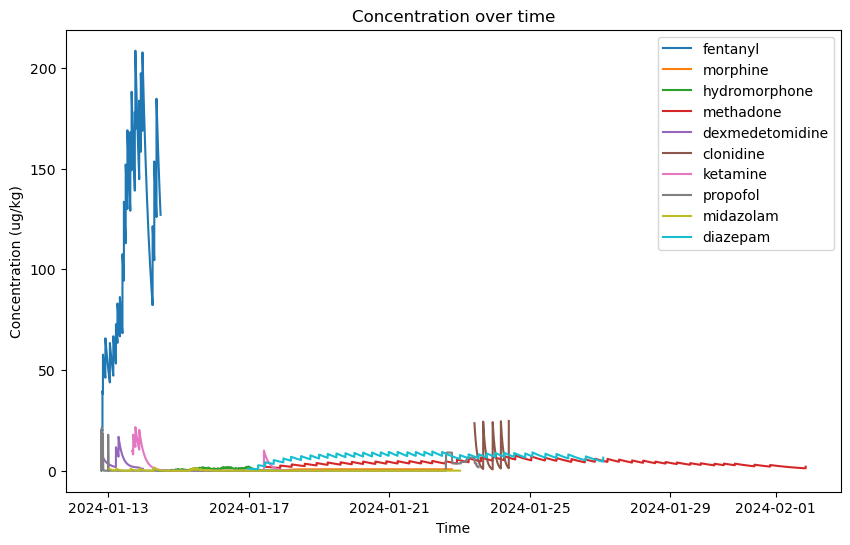

In [7]:
for drug_name in drug_concentrations:
    mar.plot_concentration(drug_concentrations, drug_name, show=False, save=os.path.join(output_dir, f'Patient{pat_num}', f'Patient{pat_num}_{drug_name}_concentration.png'))

mar.plot_concentration(drug_concentrations, 'all', show=True, save=None)
# mar.plot_concentration(drug_concentrations, 'all', show=True, save=os.path.join(output_dir, f'Patient{pat_num}', f'Patient{pat_num}_all_concentration.png'))

In [ ]:
metrics = {
    'heart_rate': pd.DataFrame({
        'time': sickbay_data['time'],
        'heart_rate': sickbay_data['heart_rate']
    }),
    'respiratory_rate': pd.DataFrame({
        'time': sickbay_data['time'],
        'respiratory_rate': sickbay_data['respiratory_rate']
    }),
    'acceleration': pd.DataFrame({
        'time': accel_data['time'],
        'acceleration': accel_data['a']
    }),
}

In [ ]:
# display(metrics['heart_rate'])
# display(metrics['respiratory_rate'])
# display(metrics['acceleration'])

,time,heart_rate
0,2024-01-15 13:00:00,92.0
1,2024-01-15 13:00:02,91.0
2,2024-01-15 13:00:04,91.0
3,2024-01-15 13:00:06,90.0
4,2024-01-15 13:00:08,90.0
...,...,...
389774,2024-01-24 15:36:34,86.0
389775,2024-01-24 15:36:36,86.0
389776,2024-01-24 15:36:38,86.0
389777,2024-01-24 15:36:40,86.0


,time,respiratory_rate
0,2024-01-15 13:00:00,22.0
1,2024-01-15 13:00:02,22.0
2,2024-01-15 13:00:04,22.0
3,2024-01-15 13:00:06,22.0
4,2024-01-15 13:00:08,22.0
...,...,...
389774,2024-01-24 15:36:34,17.0
389775,2024-01-24 15:36:36,16.0
389776,2024-01-24 15:36:38,16.0
389777,2024-01-24 15:36:40,16.0


,time,acceleration
0,2024-01-15 12:20:00,1.014613
1,2024-01-15 12:20:02,1.009875
2,2024-01-15 12:20:04,1.010304
3,2024-01-15 12:20:06,1.010833
4,2024-01-15 12:20:08,1.011220
...,...,...
95585,2024-01-17 17:26:40,0.964496
95586,2024-01-17 17:26:42,1.379156
95587,2024-01-17 17:26:44,1.022930
95588,2024-01-17 17:26:46,1.025741


In [9]:
windows = [2, 60, 3600]

In [145]:
# for window in windows:
#     mar.plot_metrics(metrics, window=window, std=True, show=True, save=os.path.join(output_dir, f'Patient{pat_num}', f'Patient{pat_num}_metrics_{window}s.png'))
#     mar.plot_metrics(metrics, window=window, std=True, show=True, save=None)

In [10]:
start = max([df['time'].min() for df in metrics.values()])
stop = min([df['time'].max() for df in metrics.values()])

print(start)
print(stop)

2024-01-15 13:00:00
2024-01-17 17:26:48


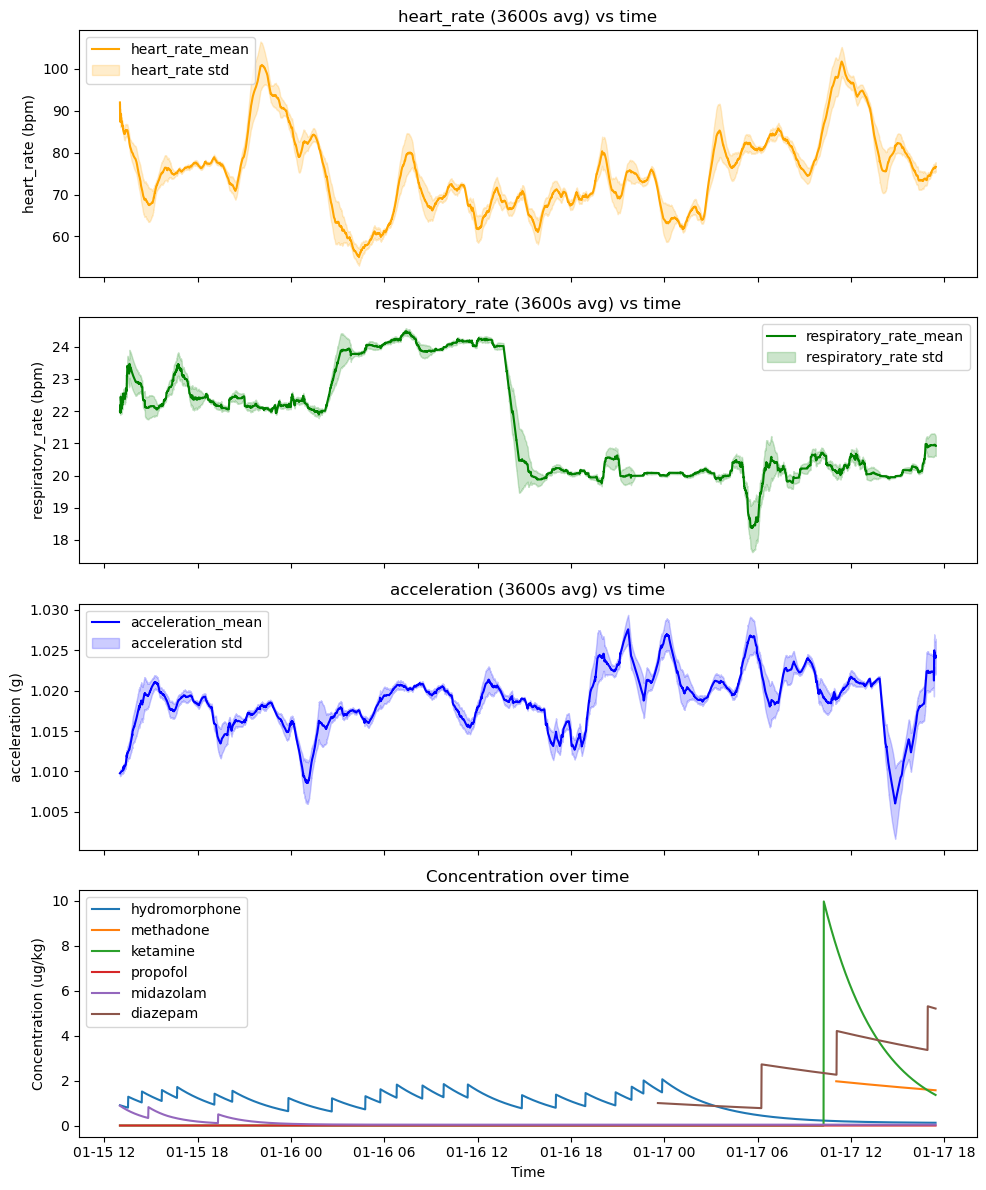

In [147]:
# mar.plot_metrics_and_concentrations(metrics, drug_concentrations, drug_name='all', window=3600, std=True, start=start, stop=stop, show=True, save=os.path.join(output_dir, f'Patient{pat_num}', f'Patient{pat_num}_metrics_and_concentrations_{3600}s.png'))
mar.plot_metrics_and_concentrations(metrics, drug_concentrations, drug_name='all', window=3600, std=True, start=start, stop=stop, show=True, save=None)

In [148]:
# start = '2023-11-21 00:00:00'
# stop = '2023-11-21 23:59:59'

# print(start)
# print(stop)

In [149]:
# mar.plot_metrics_and_concentrations(metrics, drug_concentrations, drug_name=['dexmedetomidine', 'clonidine'], window=3600, std=True, start=start, stop=stop, show=True, save=None)

In [150]:
sbs_data['MD_SBS'] = pd.to_numeric(sbs_data['MD_SBS'], errors='coerce')
sbs_data.dropna(subset=['MD_SBS'], inplace=True)
sbs_data.reset_index(drop=True, inplace=True)
sbs_data['MD_SBS'] = sbs_data['MD_SBS'].astype(int)

display(sbs_data)

,time,MD_SBS,TM_SBS,SBS,Default,Stimulation,Stim-Y-type,SedPRN,SedPRN-Y-type?,BlockPRN?,Lights on?,In bed?,StimDur_MD,Notes_MD
0,2024-01-15 13:19:00,-2,-2,-2,NaN,yes,suction,N,NaN,N,Y,Y,1.0,moving mouth around but flatish on ventilator ...
1,2024-01-15 13:30:00,-2,-2,-2,NaN,yes,touch,N,NaN,N,Y,Y,1.0,riding vent
2,2024-01-15 14:00:00,-2,-2,-2,NaN,yes,blood draw,Y,HYDROMORPHONE,N,Y,Y,2.0,riding vent
3,2024-01-15 14:36:00,-2,-2,-2,NaN,yes,touch,Y,NaN,N,Y,Y,1.0,"reacts quickly and then drifts off, could be -..."
4,2024-01-15 15:16:00,-1,-1,-1,NaN,yes,touch,Y,HYDROMORPHONE,N,Y,Y,1.0,"reacts quickly and then drifts off, could be -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2024-01-23 15:02:00,0,0,0,NaN,yes,touch,Y,KETAMINE,N,Y,Y,2.0,agitated and then quickly calms
194,2024-01-23 15:36:00,0,0,0,NaN,yes,touch,Y,MIDAZOLAM,N,Y,Y,1.0,calms quickly
195,2024-01-23 15:58:00,0,0,0,NaN,yes,touch,Y,NaN,N,Y,Y,2.0,calm and awake
196,2024-01-23 18:43:00,0,0,0,NaN,yes,"touch, procedure",N,NaN,N,Y,Y,2.0,"awake and responsive, calms quickly"


In [151]:
sbs_data_md = sbs_data[['time', 'MD_SBS']].copy()
sbs_data_md.rename(columns={'MD_SBS': 'sbs'}, inplace=True)

display(sbs_data_md)

,time,sbs
0,2024-01-15 13:19:00,-2
1,2024-01-15 13:30:00,-2
2,2024-01-15 14:00:00,-2
3,2024-01-15 14:36:00,-2
4,2024-01-15 15:16:00,-1
...,...,...
193,2024-01-23 15:02:00,0
194,2024-01-23 15:36:00,0
195,2024-01-23 15:58:00,0
196,2024-01-23 18:43:00,0


In [152]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

def plot_metrics_and_concentrations_and_sbs(data, drug_concentrations, sbs, drug_name='all', window=2, std=True, sbs_changes=False, start=None, stop=None, show=False, save=None):
    """
    Plot various metrics and drug concentration over time.
    
    Parameters:
        data (dict): Dictionary containing DataFrames for each metric.
        drug_concentrations (dict): Dictionary containing DataFrames of drug concentrations.
        sbs (DataFrame): DataFrame containing SBS data.
        drug_name (list): List of drug names to plot. Default is 'all'.
        window (int): Window size in seconds for moving average. Default is 2.
        std (bool): Whether to plot the standard deviation as a shaded area. Default is True.
        sbs_changes (bool): Whether to plot SBS only when there are changes. Default if False.
        start (str): Start time for the plot. If None, the plot will start from the beginning of the data. Default is None.
        stop (str): End time for the plot. If None, the plot will end at the last time point of the data. Default is None.
        show (bool): Whether to show the plot. Default is True.
        save (str): File path to save the plot. If None, the plot will not be saved. Default is None.
    """
    data = data.copy()
    drug_concentrations = drug_concentrations.copy()

    for metric in data:
        data[metric][metric] = data[metric][metric].rolling(window=window//2, min_periods=1).mean()
        
        if std:
            data[metric][f'{metric}_std'] = data[metric][metric].rolling(window=window//2, min_periods=1).std()

    _, axs = plt.subplots(len(data)+1, 1, figsize=(10, 3*(len(data)+1)), sharex=True)

    for ax, metric in enumerate(data):
        if metric == "heart_rate":
            color = 'orange'
            ylabel = 'heart_rate (bpm)'
        elif metric == 'respiratory_rate':
            color = 'green'
            ylabel = 'respiratory_rate (bpm)'
        elif metric == 'acceleration':
            color = 'blue'
            ylabel = 'acceleration (g)'
        else:
            color = 'purple'
            ylabel = f'{metric}'

        if start is None:
            start = min([data[metric]['time'].iloc[0] for metric in data])
        
        if stop is None:
            stop = max([data[metric]['time'].iloc[-1] for metric in data])

        data[metric] = data[metric][(data[metric]['time'] >= pd.to_datetime(start)) & (data[metric]['time'] <= pd.to_datetime(stop))].reset_index(drop=True)

        datum = data[metric]
        axs[ax].plot(datum['time'], datum[f'{metric}'], label=f'{metric}_mean', color=color)

        if std:
            axs[ax].fill_between(datum['time'], 
                                 datum[f'{metric}'] - datum[f'{metric}_std'], 
                                 datum[f'{metric}'] + datum[f'{metric}_std'], 
                                 color=color, alpha=0.2, label=f'{metric} std')

        if window == 2:
            axs[ax].set_title(f'{metric} vs time')
        else:
            axs[ax].set_title(f'{metric} ({window}s avg) vs time')

        axs[ax].set_ylabel(ylabel)
        axs[ax].legend()

    axs[-1].set_title('Drug Concentration vs Time')

    if not isinstance(drug_name, list):
        drug_name = [drug_name]

    if drug_name == ['all']:
        drug_name = drug_concentrations.keys()
        title = ''
    else:
        title = ', '.join(drug_name)

    if start is None:
        start = min([df['time'].iloc[0] for df in drug_concentrations.values()])

    if stop is None:
        stop = max([df['time'].iloc[-1] for df in drug_concentrations.values()])
    
    for drug in drug_concentrations:
        drug_concentrations[drug] = drug_concentrations[drug][(drug_concentrations[drug]['time'] >= pd.to_datetime(start)) & (drug_concentrations[drug]['time'] <= pd.to_datetime(stop))].reset_index(drop=True)

    for drug in drug_name:
        if drug_concentrations[drug].empty:
            continue
        
        axs[-1].plot(drug_concentrations[drug]['time'], drug_concentrations[drug]['concentration'], label=drug)
        axs[-1].set_xlabel('Time')
        axs[-1].set_ylabel('Concentration (ug/kg)')
        axs[-1].legend()

        if drug_name == drug_concentrations.keys():
            axs[-1].set_title('Concentration over time')
        else:
            axs[-1].set_title(f'Concentration of {title} over time')

    sbs_df = sbs.copy()
    sbs_df = sbs_df[(sbs_df['time'] >= pd.to_datetime(start)) & (sbs_df['time'] <= pd.to_datetime(stop))].reset_index(drop=True)

    if sbs_changes:
        sbs_df = sbs_df[sbs_df['sbs'].diff().fillna(sbs_df['sbs']).astype(bool)]

    color_map = {
        -2: 'purple',
        -1: 'blue',
         0: 'green',
         1: 'yellow',
         2: 'red',
         3: 'black',
    }

    for _, row in sbs_df.iterrows():
        t = row['time']
        c = color_map.get(row['sbs'], 'black')
        for ax in axs:
            ax.axvline(t, color=c, linestyle='-', alpha=0.2)

    # 1) Capture the existing drug handles & labels
    drug_handles, drug_labels = axs[-1].get_legend_handles_labels()

    # 2) Re‑draw the drug legend in the upper left
    drug_legend = axs[-1].legend(
        handles=drug_handles,
        labels=drug_labels,
        title='Drug',
        loc='upper left',
        frameon=True
    )

    # 3) Build SBS handles & labels
    sbs_handles = []
    sbs_labels  = []
    for level, color in color_map.items():
        sbs_handles.append(Line2D([0], [0], color=color, linestyle='--', lw=2))
        sbs_labels.append(f'SBS {level}')

    # 4) Draw the SBS legend in the upper right
    sbs_legend = axs[-1].legend(
        handles=sbs_handles,
        labels=sbs_labels,
        title='SBS',
        loc='upper right',
        frameon=True
    )

    # 5) Re‑add the drug legend so both show
    axs[-1].add_artist(drug_legend)
    
    plt.tight_layout()
    
    if save:
        plt.savefig(save)

    if show:
        plt.show()
    
    plt.close()

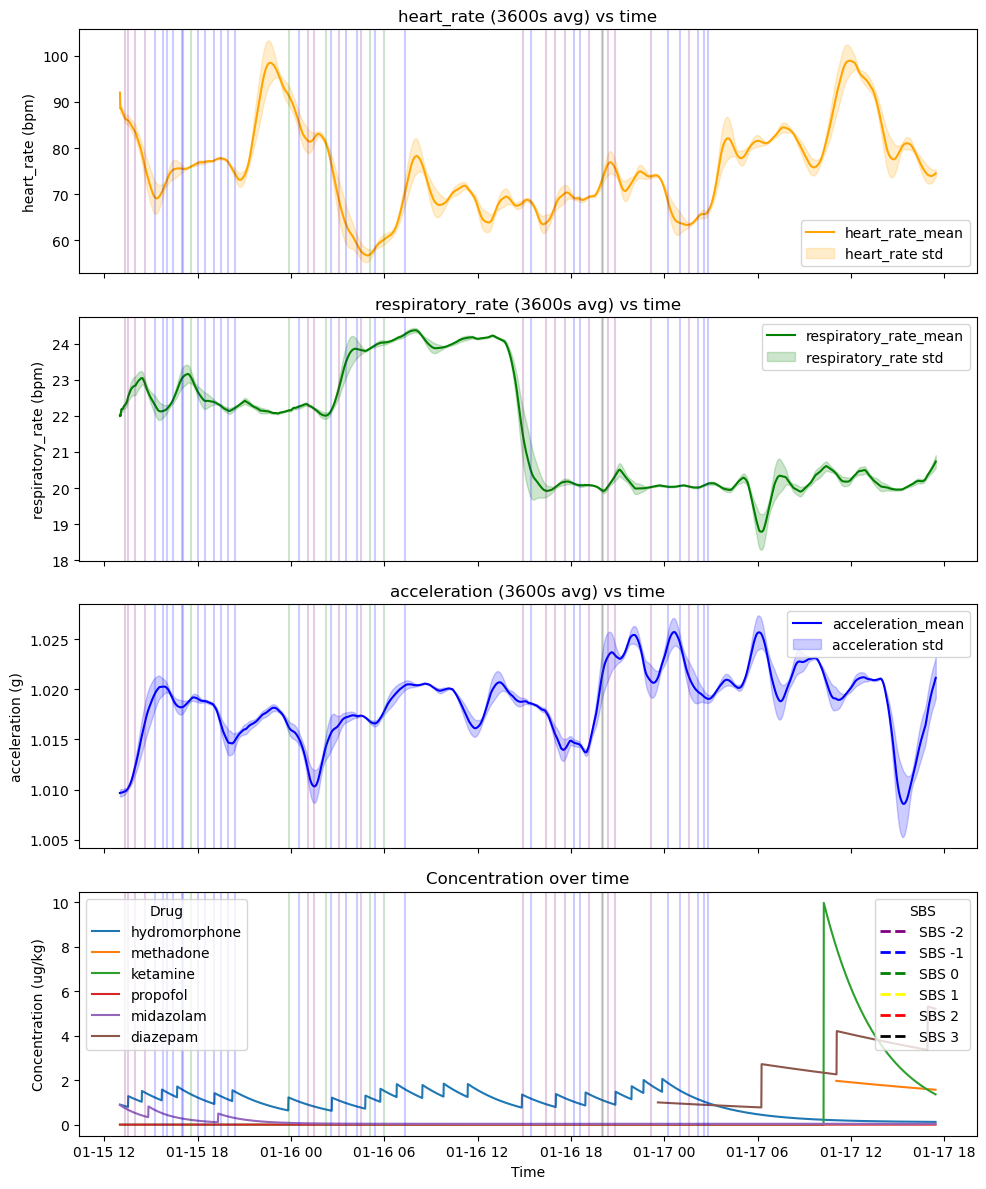

In [153]:
plot_metrics_and_concentrations_and_sbs(data=metrics, drug_concentrations=drug_concentrations, sbs=sbs_data_md, drug_name='all', window=3600, std=True, sbs_changes=False, start=start, stop=stop, show=True, save=False)

In [27]:
from datetime import timedelta

hydromorphone_df = mar.filter_drug(mar_classes['narcotics'], 'hydromorphone')
new_hydromorphone_df = []

for i in range(len(hydromorphone_df)):
    if 'Given' in hydromorphone_df['mar_action'].iloc[i]:
        new_hydromorphone_df.append(hydromorphone_df.iloc[i])

hydromorphone_df = pd.DataFrame(new_hydromorphone_df)
hydromorphone_df['start_time'] = hydromorphone_df['time'] - timedelta(minutes=15)
hydromorphone_df['end_time'] = hydromorphone_df['time'] + timedelta(minutes=30)

display(hydromorphone_df)

,time,dose,mar_action,med_name,start_time,end_time
11,2024-01-14 19:01:00,0.3940,['Given'],['HYDROMORPHONE BOLUS FROM BAG (JHH PEDS)'],2024-01-14 18:46:00,2024-01-14 19:31:00
15,2024-01-14 21:46:00,0.3940,['Given'],['HYDROMORPHONE BOLUS FROM BAG (JHH PEDS)'],2024-01-14 21:31:00,2024-01-14 22:16:00
18,2024-01-14 23:29:00,0.3940,['Given'],['HYDROMORPHONE BOLUS FROM BAG (JHH PEDS)'],2024-01-14 23:14:00,2024-01-14 23:59:00
22,2024-01-15 02:23:00,0.3940,['Given'],['HYDROMORPHONE BOLUS FROM BAG (JHH PEDS)'],2024-01-15 02:08:00,2024-01-15 02:53:00
29,2024-01-15 07:39:00,0.3940,['Given'],['HYDROMORPHONE BOLUS FROM BAG (JHH PEDS)'],2024-01-15 07:24:00,2024-01-15 08:09:00
31,2024-01-15 08:41:00,0.4000,['Given'],['HYDROMORPHONE 2 MG/ML INJECTION SOLUTION (PE...,2024-01-15 08:26:00,2024-01-15 09:11:00
35,2024-01-15 10:30:00,0.4925,['Given'],['HYDROMORPHONE BOLUS FROM BAG (JHH PEDS)'],2024-01-15 10:15:00,2024-01-15 11:00:00
37,2024-01-15 11:32:00,0.4925,['Given'],['HYDROMORPHONE BOLUS FROM BAG (JHH PEDS)'],2024-01-15 11:17:00,2024-01-15 12:02:00
40,2024-01-15 13:32:00,0.4925,['Given'],['HYDROMORPHONE BOLUS FROM BAG (JHH PEDS)'],2024-01-15 13:17:00,2024-01-15 14:02:00
42,2024-01-15 14:25:00,0.4925,['Given'],['HYDROMORPHONE BOLUS FROM BAG (JHH PEDS)'],2024-01-15 14:10:00,2024-01-15 14:55:00


C:\Users\yaoda\AppData\Local\Temp\ipykernel_15552\1604510713.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('coolwarm')  # blue → red


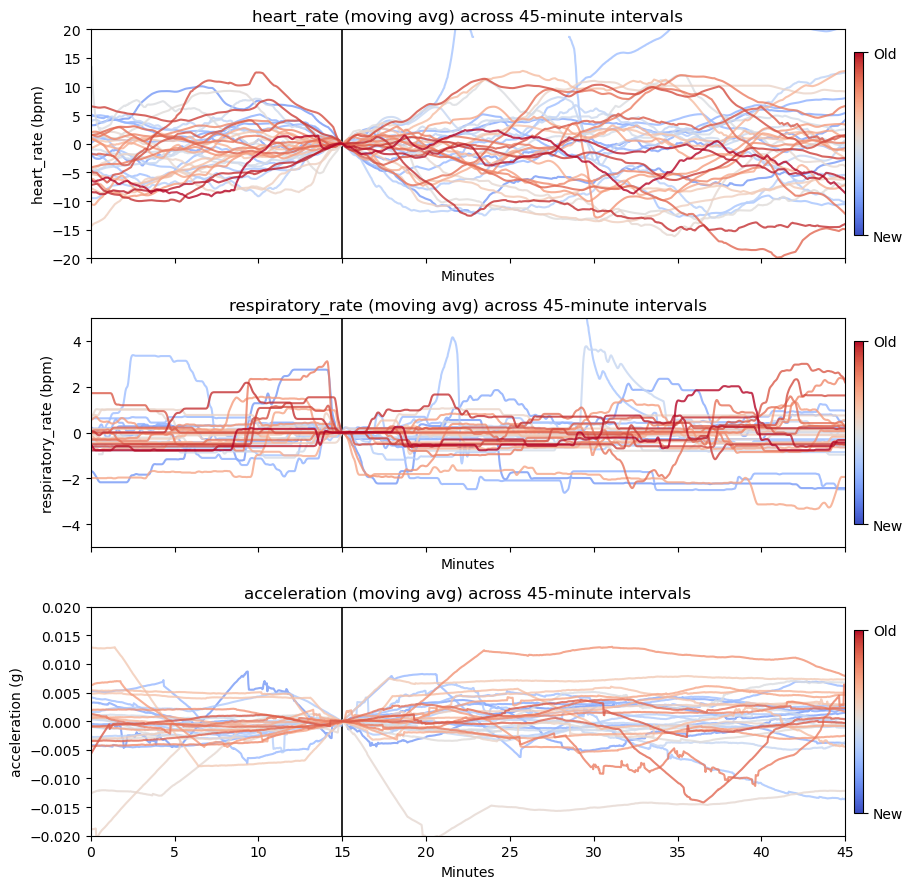

In [48]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable, get_cmap
from matplotlib.colors import Normalize
import pandas as pd
import numpy as np

def plot_metric_segments(data, intervals, window=30, save=None, show=True, zero=False):
    """
    Plot overlaid moving-average waveforms for each metric within 45-minute windows,
    with a gradient legend (blue=new, red=old) shown next to each subplot.

    Parameters:
        data (dict): Keys = metric names; values = DataFrames with 'time' and the metric.
        intervals (list of tuples): (start_time, end_time) pairs, each 45 minutes long.
        window (int): Moving average window (in points). Default is 30.
        save (str): File path to save the figure. If None, doesn't save.
        show (bool): Whether to display the plot. Default is True.
        zero (bool): If True, each waveform starts at y=0. Default is False.
    """
    cmap = get_cmap('coolwarm')  # blue → red
    norm = Normalize(vmin=0, vmax=len(intervals) - 1)

    fig, axs = plt.subplots(len(data), 1, figsize=(10, 3 * len(data)), sharex=True)

    if len(data) == 1:
        axs = [axs]

    metric_names = list(data.keys())

    for ax_idx, metric in enumerate(metric_names):
        df = data[metric].copy()
        df['time'] = pd.to_datetime(df['time'])
        df = df.sort_values('time')
        df[metric] = df[metric].rolling(window=window, min_periods=1).mean()

        ax = axs[ax_idx]
        ax.set_xlim(0, 45)
        ax.set_xlabel("Minutes")

        if zero:
            if metric == 'heart_rate':
                ax.set_ylim(-20, 20)
            elif metric == 'respiratory_rate':
                ax.set_ylim(-5, 5)
            elif metric == 'acceleration':
                ax.set_ylim(-0.02, 0.02)

        # Add vertical line at 15 minutes
        ax.axvline(15, color='black', linestyle='-', linewidth=1.2)

        for i, (start, end) in enumerate(intervals):
            seg = df[(df['time'] >= start) & (df['time'] <= end)].copy()
            if seg.empty:
                continue
            seg['minutes'] = (seg['time'] - start).dt.total_seconds() / 60
            if zero:
                y = seg[metric].values
                x = seg['minutes'].values

                if zero:
                    idx_15 = np.argmin(np.abs(x - 15))
                    y = y - y[idx_15]

            ax.plot(x, y, color=cmap(norm(i)), alpha=0.8)
            # ax.plot(seg['minutes'], seg[metric], color=cmap(norm(i)), alpha=0.8)

        ylabel = {
            "heart_rate": "heart_rate (bpm)",
            "respiratory_rate": "respiratory_rate (bpm)",
            "acceleration": "acceleration (g)"
        }.get(metric, metric)

        ax.set_title(f"{metric} (moving avg) across 45-minute intervals")
        ax.set_ylabel(ylabel)

        sm = ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = fig.colorbar(sm, ax=axs[ax_idx], orientation='vertical', pad=0.01, shrink=0.8)
        cbar.set_ticks([0, len(intervals) - 1])
        cbar.set_ticklabels(['New', 'Old'])

    plt.tight_layout()

    if save:
        plt.savefig(save)

    if show:
        plt.show()

    plt.close()

intervals = list(zip(hydromorphone_df['start_time'], hydromorphone_df['end_time']))
plot_metric_segments(metrics, intervals, window=150, zero=True)